# Geodatenanalyse 1


## Tag 4 / Block 1 - Teil 10

## Einführung in die Kartografie mit Python

Ca. 20 Minuten

## Inhalt

- Karten als Abbildungen
- Verwendung von Projektionen für Karten
- Umwandlung zwischen Adressen und Geokoordinaten
- Umgang mit geometrischen Objekten

## Geschichte der Kartografie

Eine mittelalterliche Darstellung der Ecumene (1482, Johannes Schnitzer, Kupferstecher), konstruiert nach den Koordinaten in Ptolemäus' Geographie und unter Verwendung seiner zweiten Kartenprojektion. Die Übersetzung ins Lateinische und die Verbreitung der Geographie in Europa, zu Beginn des 15. Jahrhunderts, markierte die Wiedergeburt der wissenschaftlichen Kartographie, nach mehr als einem Jahrtausend der Stagnation. [Wikipedia](https://en.wikipedia.org/wiki/Cartography)

<img width=400 style="float: left;" src="images\Claudius_Ptolemy-The_World.jpg">

## Übersicht über *Cartopy*

- Cartopy ist ein Python-Paket, das für die Verarbeitung von Geodaten entwickelt wurde, um Karten und andere Analysen von Geodaten zu erstellen


- Cartopy nutzt die leistungsstarken Bibliotheken PROJ.4, NumPy und Shapely und enthält eine programmatische Schnittstelle, die auf Matplotlib aufbaut, um Karten in Publikationsqualität zu erstellen


- Hauptmerkmale von Cartopy sind die objektorientierten Projektionsdefinitionen und die Fähigkeit, Punkte, Linien, Vektoren, Polygone und Bilder zwischen diesen Projektionen zu transformieren

Siehe auch die offizielle Webseite des Pakets [*Cartopy*](https://scitools.org.uk/cartopy/)


**ACHTUNG**: Erstmal müssen weitere Pakete werden: [Anaconda Cartopy](https://anaconda.org/conda-forge/cartopy), [Anaconda Geopy](https://anaconda.org/conda-forge/geopy), [Anaconda Pyproj](https://anaconda.org/conda-forge/pyproj)

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### Was ist das Problem?

[Delmelle & Dezzani, 2009](https://doi.org/10.4018/978-1-59140-995-3.ch012)

<img width=400 style="float: left;" src="images\mapping_process.jpg">

### Die Projektionen der Erde sind vielfältig

[Geographic Information System Basics](https://2012books.lardbucket.org/books/geographic-information-system-basics/s06-02-map-scale-coordinate-systems-a.html)

<img width=400 style="float: left;" src="images\projections.jpg">

### Beispiele für gewöhnliche Projektionen

[Compare Map Projections](https://map-projections.net/)

<img width=600 style="float: left;" src="images\earth_projections.png">

### Beispiel: Transformation der Plattkarte

Die Plattkarte ist eine abstandstreue (längentreue) Zylinderprojektion.

Vorwärtstransformation:

$ x = (\lambda - \lambda_0) \cos \varphi_1$

$ y = (\varphi - \varphi_1)$


Rückwärtstransformation:

$ \lambda = \frac{x} {\cos \varphi_1} + \lambda_0$

$ \varphi = y + \varphi_1$

[Wikipedia Plattkarte](https://de.wikipedia.org/wiki/Plattkarte)

### Die Lösung ...

- Oft werden Daten in WGS84 (Längengrad, Breitengrad, Höhe) oder einem bereits projezierten Koordinatensystem geliefert

- Diese sollen dann analysiert und/oder visualisiert werden

- Die dafür benötigten Transformationen sind als Bibliothek in *Cartopy* eingebaut!


### Einfaches Beispiel: Europakarte

Man beachte das *projection* Schlüsselwort!

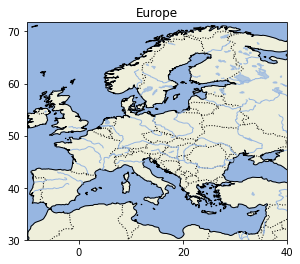

In [2]:
# eine Achse erstellen und die Projektion laden
ax = plt.axes(projection=cartopy.crs.PlateCarree())

# eingebaute Objekte anzeigen
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.7)
ax.add_feature(cartopy.feature.RIVERS)

# die Achsenmarker setzen ...
ax.set_xticks([0, 20, 40], crs=ccrs.PlateCarree())
ax.set_yticks([30, 40, 50, 60, 70], crs=ccrs.PlateCarree())

# den Ausschnitt festlegen
ax.set_extent([-10, 40, 30, 70])

ax.set_title('Europe')

plt.show()

### Eingebaute Projektionen

- Fast alle Projektionen sind in *Cartopy* bereits eingebaut, siehe [Projektionen](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)

- Für spezielle Projektionen gibt es den [European Petroleum Survey Group (EPSG)](https://epsg.org/)

- Für Projektionen siehe auch [Coordinate Systems Worldwide](https://epsg.io/)


### Beispiel für eine spezielle Projektion

### Eingabeute *Features*

Siehe: [Cartopy features class](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html)

<img width=500 style="float: left;" src="images\cartopy_features.png">

**Hinweis**: Die Daten kommen von offenen Archiven, wie z.B. [Natural Earth](http://www.naturalearthdata.com/) oder [NOAA](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html)

### Beispiel für zusätzliche *Features*

Die Grenzen der inneraustralischen Gebiete (states and territories):

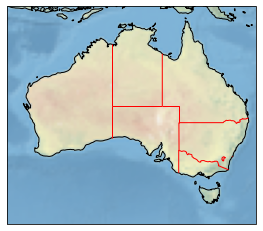

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([110, 155, -45, -8])

# Hintergrundbild
ax.stock_img()

# Standard Features
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)

# die Grenzen der inneraustralischen Gebiete (states and territories)
states_provinces = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='red')

plt.show()

### Integration von eingebauten Hintergrundbildern

Beispiel stammt von [Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/eyja_volcano.html)

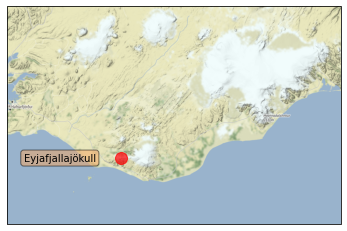

In [9]:
from matplotlib.transforms import offset_copy

# Create a Stamen terrain background instance
stamen_terrain = cartopy.io.img_tiles.Stamen('terrain')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65], crs=cartopy.crs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add a marker for the Eyjafjallajökull volcano.
ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
        alpha=0.7, transform=cartopy.crs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = cartopy.crs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
ax.text(-19.613333, 63.62, u'Eyjafjallajökull', verticalalignment='center', horizontalalignment='right',
        transform=text_transform, bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

plt.show()

### Externes Hintergrundbild

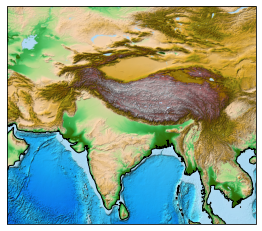

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())

# Hintergrundbild
img = plt.imread('images/color_etopo1_ice_low.jpg')
ax.imshow(img, origin='upper', extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree())

# Standard Features
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)

ax.set_extent([55, 110, 5, 50])

plt.show()

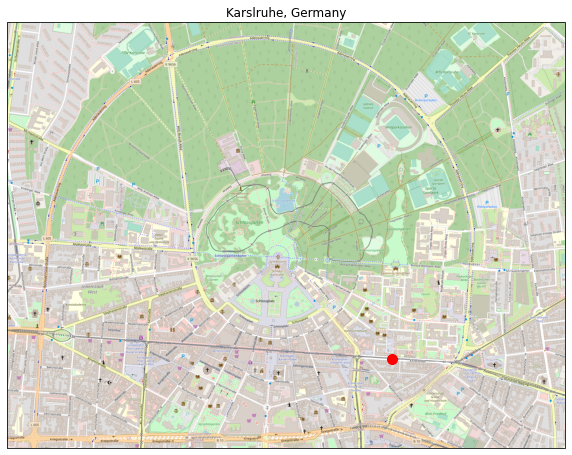

In [13]:
import numpy as np

fig = plt.figure(figsize=(10, 10))

# Open Street Map Interface laden ...
imagery = cartopy.io.img_tiles.OSM()
# Achse anlegen mit Koordinatensystem
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)

# das Kartenbild hinzufügen
ax.add_image(imagery, 16)

# einen WGS84 Punkt dazufügen
plt.plot(8.4126047, 49.0091647, markersize=10, marker='o', color='red', transform=cartopy.crs.Geodetic())
plt.title('Karslruhe, Germany')

# Ausschnitt einstellen
ax.set_extent((8.385, 8.425, 49.005, 49.025))

plt.show()

### Beispiel: Tag und Nacht auf der Erde

Dieses Beispiel kommt von [Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/nightshade.html)

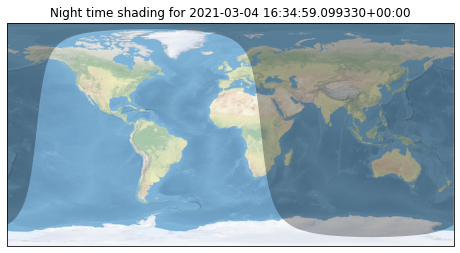

In [18]:
import datetime as dt

fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 1, 1, projection=cartopy.crs.PlateCarree())

ax.stock_img()

# momentane Zeit in UTC
current_time = dt.datetime.now(tz=dt.timezone.utc)
ax.add_feature(cartopy.feature.nightshade.Nightshade(current_time, alpha=0.3))

ax.set_title('Night time shading for {}'.format(current_time))

plt.show()

**Hinweis**: Für weitere Beispiele wird hier auf die [Referenz für Cartopy](https://scitools.org.uk/cartopy/) verwiesen.

## Was ist *Pyproj*?

- Python-Schnittstelle zu [PROJ](https://proj.org)

- PROJ ist eine Bibliothek für kartographische Projektionen und Koordinatentransformationen

- Damit lassen sich sämtliche Geo-Koordinaten transformieren

Mehr dazu auf der Projektseite von [Pyproj](https://pyproj4.github.io/pyproj/stable/index.html)

### Transformationen für Deutschlands

- Eine übliche Transformation geschieht von WGS84 (EPSG: 4326) in UTM, oder andersrum

- Das UTM-System (von englisch *Universal Transverse Mercator*) ist ein globales Koordinatensystem

- Die Zone 32 im UTM (EPSG: 25832) wird oft auch für die Darstellung von deutschlandweiten Datensätzen verwendet

In [19]:
from pyproj import Transformer

# Karlsruhe als WGS84
# ACHTUNG: Koordinaten sind andersrum!
lon, lat = 8.4036527, 49.0068901

# hier werden beide Koordinatensystem definiert
transformer = Transformer.from_crs("epsg:4326", "epsg:25832")

# Transformation ...
x2, y2 = transformer.transform(lon, lat)

# Ergebnis ...
print('Osten: {:.3f} m'.format(x2))
print('Norden: {:.3f} m'.format(y2))

Osten: 5294110.343 m
Norden: 1209467.475 m


## Was ist *geopy*?

- geopy ist ein Python-Client für mehrere beliebte Geokodierungs-Webdienste

- geopy macht es Python-Entwicklern leicht, die Koordinaten von Adressen, Städten, Ländern und Sehenswürdigkeiten auf der ganzen Welt mithilfe von Geocodierern von Drittanbietern und anderen Datenquellen zu ermitteln

Mehr dazu auch auf der Projektwebseite von [geopy](https://geopy.readthedocs.io/en/stable/)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Geodatenanalyse 1")
location = geolocator.geocode("Kaiserstrasse 20, 76131 Karlsruhe")
location

Distanz der Luftlinie ausrechnen:

In [ ]:
from geopy.distance import geodesic

# Koordinaten für Karlsruhe
BER = geolocator.geocode("Karlsruhe, Germany")

# Koordinaten für Sydney
SYD = geolocator.geocode("Sydney, Australia")

# Distanz ausrechnen
distance = geodesic(BER[1], SYD[1]).km

print('Distanz: {:.3f} km'.format(distance))

## Übersicht über *shapely*?

- Ein Paket für die Manipulation und Analyse von geometrischen Objekten in der kartesischen Ebene

- Besonders nützlich zur Unterstützung in der Kartografie

- Beinhaltet viele geometrische Berechnungen

In [ ]:
import shapely as shp

### Geometrische Objekte in *shapely*

- Punkt (*Point*) besteht aus einem Koordinatenpaar (x, y)


- Kurve (*LineString*) besteht aus beliebig vielen Koordinatenpaaren ((x1, y1), (x2, y2))


- Polygon (*Polygon*) besteht aus beliebig vielen Koordinatenpaaren ((x1, y1), (x2, y2)), ist aber in sich geschlossen.


- Ansammlung (*collection*) ist eine Ansammlung an Objekten, welche z.B. durch eine Transformation entstanden ist

In [ ]:
point = shp.geometry.Point(1, 2)
point

In [ ]:
line = shp.geometry.LineString([(0, 0), (1, 2), (2, 1), (1, 1)])
line

In [ ]:
poly = shp.geometry.Polygon([(0, 0), (1, 0.5), (0.75, 0)])
poly

### Eigenschaften der Datenobjekte

- *area* (Fläche)

- *bounds* (Eingenzung)

- *length* (Länge)

- *geom_type* (Geometrietyp)

- *distance* (Distanz)

- *centroid* (geometrisches Zentrum)

... und einige weitere!


In [ ]:
line.length

In [ ]:
poly.area

### Zweidimensionale Analyseverfahren

*Shapely* bietet Analysemethoden, die neue geometrische Objekte zurückgeben.

In [ ]:
a = shp.geometry.Point(0, 0).buffer(0.5)
a

In [ ]:
b = shp.geometry.Polygon([(-1, -0.2), (1, 1), (0.75, 0)])
b

In [ ]:
a.union(b)

In [ ]:
c = a.difference(b)
c

In [ ]:
b.difference(a)

In [ ]:
print(c.centroid)

In [ ]:
b1 = shp.affinity.translate(b, -2, 4)
print(b, b1)

**Hinweis**: Es gibt viele unterschiedliche Methoden, bitte für die nachfolgenden Übungen die [Funktionshilfe](https://shapely.readthedocs.io/en/stable/manual.html) ansehen!

### Beispiel in der Kartografie

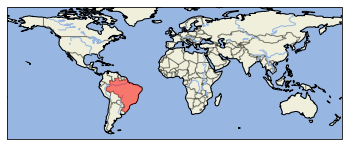

In [20]:
import cartopy.io.shapereader as shpreader

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    shape = country.geometry
    # Ein Bug!
    if (country.geometry.type == 'Polygon'):
        shape = [country.geometry]
        
    # print(country.attributes['SOVEREIGNT'])
    if country.attributes['SOVEREIGNT'] == "Brazil":
        colour = 'red'
        brazil = country.geometry
    else:
        colour = 'none'
        
    ax.add_geometries(shape, ccrs.PlateCarree(), facecolor=colour, alpha=0.5)

plt.show()

Jetzt haben wir das Polygon für Brazilien:

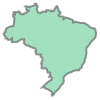

In [21]:
brazil

In [22]:
print(brazil.centroid)

POINT (-53.05434003576711 -10.80677364349892)


Dies war nur eine kurze Illustration der Möglichkeiten in der Kartografie.

Eine schöne Übersicht findet sich auf [GitHub](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html).


## ENDE